In [ ]:

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#import libraries for data imputation
!pip install autoimpute
from sklearn.linear_model import ARDRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from autoimpute.imputations import SingleImputer

     |████████████████████████████████| 100 kB 3.1 MB/s 


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df1 = pd.read_csv(('/content/drive/MyDrive/Thesis/SB11_20181.TXT'),sep="¬",header=0,index_col=False)
df2 = pd.read_csv('/content/drive/MyDrive/Thesis/SB11_20182.TXT',sep="¬",header=0,index_col=False)
df3 = pd.read_csv('/content/drive/MyDrive/Thesis/SB11_20191.TXT',sep="¬",header=0,index_col=False)
df4 = pd.read_csv('/content/drive/MyDrive/Thesis/SB11_20192.TXT',sep="¬",header=0,index_col=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/p

In [ ]:
print(df1.shape, df2.shape, df3.shape,df4.shape)

(12527, 82) (549934, 83) (21083, 82) (546212, 82)


In [ ]:
#check for discrepancies among lists
df1col = list(df1.columns.values.tolist())
df2col = list(df2.columns.values.tolist())
df3col = list(df3.columns.values.tolist())
df4col = list(df4.columns.values.tolist())
print(set(df1col) ^ set(df2col),set(df2col) ^ set(df4col))

{'ESTU_PILOPAGA', 'ESTU_LIMITA_MOTRIZ', 'ESTU_GENERACION-E'} {'ESTU_LIMITA_MOTRIZ'}


In [ ]:
#drop incompatible columns and not predictable connected variable
df1 = df1.drop(['ESTU_PILOPAGA'], axis=1)
df2 = df2.drop(['ESTU_GENERACION-E', 'ESTU_LIMITA_MOTRIZ'], axis=1)
df3 = df3.drop(['ESTU_GENERACION-E'], axis=1)
df4 = df4.drop(['ESTU_GENERACION-E'], axis=1)


In [ ]:
#Merge all datasets 2018,2019
df = pd.concat([df1,df2,df3,df4])

In [ ]:
print('The shape of the 2018 and 2019 dataset is ',df.shape)

The shape of the 2018 and 2019 dataset is  (1129756, 81)


In [ ]:
df=df.rename(columns={'ESTU_TIPODOCUMENTO':'st_id_type', 'ESTU_NACIONALIDAD':'st_nationality', 'ESTU_GENERO':'st_gender',\
                   'ESTU_FECHANACIMIENTO':'st_dob', 'PERIODO':'period', 'ESTU_CONSECUTIVO':'st_public_id',\
                   'ESTU_ESTUDIANTE':'st_state', 'ESTU_PAIS_RESIDE':'st_resi_country', 'ESTU_TIENEETNIA':'st_is_ethnic',\
                   'ESTU_ETNIA':'st_ethnicity', 'ESTU_DEPTO_RESIDE':'st_resi_dept', 'ESTU_COD_RESIDE_DEPTO':'st_cod_resi_dept',\
                   'ESTU_MCPIO_RESIDE':'st_resi_mun', 'ESTU_COD_RESIDE_MCPIO':'st_cod_resi_mun', 'FAMI_ESTRATOVIVIENDA':'fam_home_strat',\
                   'FAMI_PERSONASHOGAR':'fam_inh_home', 'FAMI_CUARTOSHOGAR':'fam_home_rooms', 'FAMI_EDUCACIONPADRE':'fam_edu_father',\
                   'FAMI_EDUCACIONMADRE':'fam_edu_mother', 'FAMI_TRABAJOLABORPADRE':'fam_work_father','FAMI_TRABAJOLABORMADRE':'fam_work_mother',\
                   'FAMI_TIENEINTERNET':'fam_has_internet', 'FAMI_TIENESERVICIOTV':'fam_has_tv_serv','FAMI_TIENECOMPUTADOR':'fam_has_pc',\
                   'FAMI_TIENELAVADORA':'fam_has_wm','FAMI_TIENEHORNOMICROOGAS':'fam_has_cooker', 'FAMI_TIENEAUTOMOVIL':'fam_has_car',\
                   'FAMI_TIENEMOTOCICLETA':'fam_has_mbike', 'FAMI_TIENECONSOLAVIDEOJUEGOS':'fam_has_vgames','FAMI_NUMLIBROS':'fam_num_books',\
                   'FAMI_COMELECHEDERIVADOS':'fam_eat_dairy','FAMI_COMECARNEPESCADOHUEVO':'fam_eat_meat',\
                   'FAMI_COMECEREALFRUTOSLEGUMBRE':'fam_eat_vegfruitcereal','FAMI_SITUACIONECONOMICA':'fam_econ_state',\
                   'ESTU_DEDICACIONLECTURADIARIA':'stu_daily_reading','ESTU_DEDICACIONINTERNET':'stu_daily_internet',\
                   'ESTU_HORASSEMANATRABAJA':'stu_wkly_wrk_hr','ESTU_TIPOREMUNERACION':'stu_comp_type', 'COLE_CODIGO_ICFES':'sch_cod_icfes',\
                   'COLE_COD_DANE_ESTABLECIMIENTO':'sch_cod_dane', 'COLE_NOMBRE_ESTABLECIMIENTO':'sch_name','COLE_GENERO':'sch_gender',\
                   'COLE_NATURALEZA':'sch_nature', 'COLE_CALENDARIO':'sch_calen','COLE_BILINGUE':'sch_bilingual', 'COLE_CARACTER':'sch_type',\
                   'COLE_COD_DANE_SEDE':'sch_cod_dane_branch','COLE_NOMBRE_SEDE':'sch_name_branch', 'COLE_SEDE_PRINCIPAL':'sch_is_branch', \
                   'COLE_AREA_UBICACION':'sch_loc_type','COLE_JORNADA':'sch_day_time', 'COLE_COD_MCPIO_UBICACION':'sch_mun_cod',\
                   'COLE_MCPIO_UBICACION':'sch_mun','COLE_COD_DEPTO_UBICACION':'sch_dept_cod', 'COLE_DEPTO_UBICACION':'sch_dept',\
                   'ESTU_PRIVADO_LIBERTAD':'st_is_conv', 'ESTU_COD_MCPIO_PRESENTACION':'std_mun_cod_pr','ESTU_MCPIO_PRESENTACION':'st_mun_pr',\
                   'ESTU_DEPTO_PRESENTACION':'st_dept_pr','ESTU_COD_DEPTO_PRESENTACION':'st_dept_cod_pr', 'PUNT_LECTURA_CRITICA':'sco_crit_read',\
                   'PERCENTIL_LECTURA_CRITICA':'perc_crit_read', 'DESEMP_LECTURA_CRITICA':'perf_crit_read','PUNT_MATEMATICAS':'sco_math',\
                   'PERCENTIL_MATEMATICAS':'perc_math', 'DESEMP_MATEMATICAS':'perf_math','PUNT_C_NATURALES':'sco_nat_sci', \
                   'PERCENTIL_C_NATURALES':'perc_nat_sci', 'DESEMP_C_NATURALES':'perf_nat_sci','PUNT_SOCIALES_CIUDADANAS':'sco_soc', \
                   'PERCENTIL_SOCIALES_CIUDADANAS':'perc_soc','DESEMP_SOCIALES_CIUDADANAS':'perf_soc', 'PUNT_INGLES':'sco_eng', \
                   'PERCENTIL_INGLES':'perc_eng','DESEMP_INGLES':'perf_eng', 'PUNT_GLOBAL':'total_score', 'PERCENTIL_GLOBAL':'total_perc',\
                   'ESTU_INSE_INDIVIDUAL':'st_socioecon_index', 'ESTU_NSE_INDIVIDUAL':'st_socioecon_lvl',\
                   'ESTU_NSE_ESTABLECIMIENTO':'sch_socioecon_level', 'ESTU_ESTADOINVESTIGACION':'st_inv_stat'})

In [ ]:
df.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_C

In [ ]:
df = df.drop(['st_cod_resi_dept', 'st_cod_resi_mun', 'sch_cod_dane_branch','sch_cod_icfes',\
              'sch_cod_dane','sch_mun_cod','sch_dept_cod','st_dept_cod_pr','std_mun_cod_pr',\
              'st_id_type','st_public_id'], axis=1)

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))

st_nationality - 0.0%
st_gender - 0.009382556941498872%
st_dob - 0.0%
period - 0.0%
st_state - 0.0%
st_resi_country - 0.0%
st_is_ethnic - 0.04700129939562171%
st_ethnicity - 93.33254260211939%
st_resi_dept - 0.04691278470749436%
st_resi_mun - 0.04691278470749436%
fam_home_strat - 6.697286847779521%
fam_inh_home - 3.171127216850364%
fam_home_rooms - 3.3611682522597803%
fam_edu_father - 6.0080229713318625%
fam_edu_mother - 5.975184022036617%
fam_work_father - 3.6252075669436583%
fam_work_mother - 3.4564985713729337%
fam_has_internet - 6.0699832530210065%
fam_has_tv_serv - 6.258873597484767%
fam_has_pc - 3.3164683347554695%
fam_has_wm - 3.2900024430053922%
fam_has_cooker - 3.439857810004992%
fam_has_car - 3.540587525093914%
fam_has_mbike - 3.3609027081953977%
fam_has_vgames - 3.540499010405787%
fam_num_books - 8.554413519379406%
fam_eat_dairy - 7.034881868297226%
fam_eat_meat - 6.354469460662303%
fam_eat_vegfruitcereal - 6.535393483194602%
fam_econ_state - 3.4039208466252893%
stu_daily_re

KeyboardInterrupt: ignored

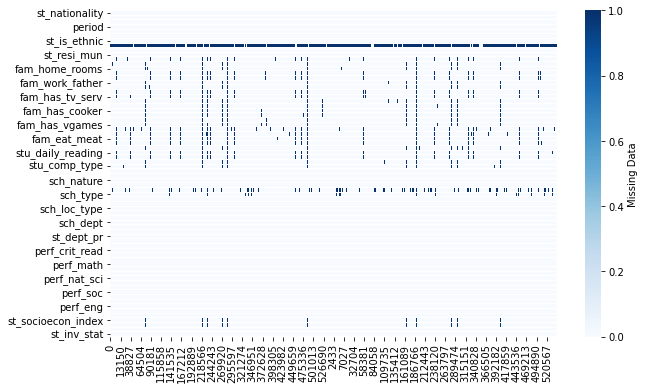

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="Blues",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("missing_data_heatmap.png", dpi=500)


In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("missing_data_map.png", dpi=100)


In [ ]:
files.download('missing_data_heatmap.png')

In [ ]:
#transform variables of 'st_socioecon_lvl'
di = {'NSE1': 1, 'NSE2': 2, 'NSE3': 3, 'NSE4': 4}
df = df.replace({'st_socioecon_lvl': di})

In [ ]:
#Create numeric variables df for multivariate imputation with sklearn
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

#selecting non numerical variables
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [ ]:
df_numeric

,period,sco_crit_read,perc_crit_read,perf_crit_read,sco_math,perc_math,perf_math,sco_nat_sci,perc_nat_sci,perf_nat_sci,sco_soc,perc_soc,perf_soc,sco_eng,perc_eng,total_score,total_perc,st_socioecon_index,st_socioecon_lvl,sch_socioecon_level
0,20181.0,47.0,16.0,2.0,46.0,25.0,2.0,47.0,27.0,2.0,41.0,15.0,2.0,44.0,21.0,226.0,20.0,54.101344,3.0,3.0
1,20181.0,45.0,13.0,2.0,62.0,61.0,3.0,58.0,51.0,3.0,44.0,20.0,2.0,58.0,45.0,263.0,37.0,66.990405,4.0,3.0
2,20181.0,44.0,12.0,2.0,43.0,20.0,2.0,45.0,23.0,2.0,34.0,6.0,1.0,32.0,5.0,204.0,12.0,45.721848,2.0,3.0
3,20181.0,65.0,64.0,3.0,75.0,89.0,4.0,61.0,59.0,3.0,69.0,80.0,3.0,50.0,32.0,331.0,70.0,51.145124,2.0,3.0
4,20181.0,69.0,79.0,4.0,62.0,59.0,3.0,63.0,64.0,3.0,61.0,61.0,3.0,62.0,50.0,318.0,63.0,53.365582,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129751,20194.0,71.0,97.0,4.0,71.0,96.0,4.0,58.0,82.0,3.0,75.0,100.0,4.0,68.0,93.0,343.0,97.0,64.363772,4.0,2.0
1129752,20194.0,47.0,32.0,2.0,56.0,65.0,3.0,52.0,64.0,2.0,48.0,57.0,2.0,47.0,49.0,252.0,56.0,55.442742,3.0,2.0
1129753,20194.0,54.0,55.0,3.0,58.0,73.0,3.0,60.0,86.0,3.0,54.0,73.0,2.0,49.0,53.0,280.0,74.0,36.546235,1.0,2.0
1129754,20194.0,76.0,100.0,4.0,78.0,100.0,4.0,65.0,94.0,3.0,74.0,99.0,4.0,58.0,79.0,360.0,99.0,47.580772,2.0,2.0


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
#replacing numerical values with multiple inputation
imput_func = IterativeImputer(estimator= ExtraTreesRegressor(n_estimators=7, random_state=123),sample_posterior=False, random_state=123, min_value = 0)
imput_func.fit(df_numeric)
df_numeric=(pd.DataFrame(imput_func.transform(df_numeric), columns = df_numeric.columns))

In [ ]:
#Extract names
df_names = np.concatenate((non_numeric_cols,numeric_cols))

In [ ]:
#Merge again df back together
df= np.concatenate((df_non_numeric,df_numeric),axis=1)
df= pd.DataFrame(data=df, columns=df_names)

In [ ]:
#replace ethnic missing values as non ethnic, as those are the majority of the population:
df['st_ethnicity'] = df['st_ethnicity'].fillna('Ninguno')

In [ ]:
df = df.dropna(subset=['st_is_ethnic', 'st_resi_dept','total_perc','sch_socioecon_level','st_socioecon_lvl','sco_eng'])

In [ ]:
print('The shape of the 2018 and 2019 dataset after NA drop is ',df.shape)

The shape of the 2018 and 2019 dataset after NA drop is  (1129225, 70)


In [ ]:
#use of logistic regression for multivariate categorical imputation
df = SingleImputer(strategy ={'fam_home_strat':'categorical','st_gender':'categorical','fam_inh_home':'categorical','fam_home_rooms':'categorical',\
                              'fam_edu_father':'categorical','fam_edu_mother':'categorical','fam_has_internet':'categorical','fam_has_tv_serv':'categorical',\
                              'fam_has_pc':'categorical','fam_has_wm':'categorical','fam_has_cooker':'categorical','fam_has_car':'categorical',\
                              'fam_has_mbike':'categorical','fam_has_vgames':'categorical','fam_num_books':'categorical','fam_eat_dairy':'categorical',\
                              'fam_eat_meat':'categorical','fam_eat_vegfruitcereal':'categorical','fam_econ_state':'categorical',\
                              'fam_work_father':'categorical','fam_work_mother':'categorical','stu_daily_reading':'categorical','stu_daily_internet':'categorical',\
                              'stu_wkly_wrk_hr':'categorical','stu_comp_type':'categorical','sch_bilingual':'categorical','sch_type':'categorical'}\
                   ,seed=123).fit_transform(df)

In [ ]:
df.shape

(1129225, 70)

In [ ]:
#transform  DOB into Pandas standard
df['st_dob'] = pd.to_datetime(df['st_dob'],format='%d/%m/%Y',errors = 'coerce')

#function to assign dates of test date to each vector
def conditions(x):
    if x == 20181.:
        return "2018-02-18"
    elif x == 20182.:
        return "2018-08-12"
    elif x == 20191.:
        return "2019-03-10"
    else:
        return "2019-08-25"

custfunc = np.vectorize(conditions)
df['test_date'] = pd.to_datetime(custfunc(df["period"]), errors = 'coerce')

df['age'] =(df['test_date'] - df['st_dob']).dt.days.astype(float)/365

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x432 with 0 Axes>

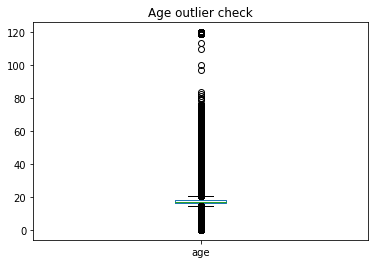

In [ ]:
#outlier check age
plt.figure(figsize=(10,6))
df.plot(kind='box', y= 'age',title= 'Age outlier check')
plt.savefig("age_outlier.png", dpi=500)
files.download('age_outlier.png')

In [ ]:
#outlier remover for numerical values
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df=remove_outlier(df, 'age')

In [ ]:
df.shape

(1061219, 72)

In [ ]:
1129225-1061219

68006

In [ ]:


df = df.drop(['sch_name','sch_name_branch','sch_is_branch','sch_dept','sch_mun','period','sco_crit_read', 'perc_crit_read', \
              'perf_crit_read', 'sco_math', 'perc_math', 'perf_math', 'sco_nat_sci', 'perc_nat_sci', 'perf_nat_sci', 'sco_soc',\
              'perc_soc', 'perf_soc', 'sco_eng', 'perc_eng','total_perc','test_date','st_dob','perf_eng','st_socioecon_lvl','st_resi_mun','st_mun_pr'], 1)
boolean_cols1 = ['fam_has_internet','fam_has_tv_serv','fam_has_pc',	'fam_has_wm','fam_has_cooker','fam_has_car','fam_has_mbike','fam_has_vgames']
boolean_cols2 = ['st_is_ethnic','sch_bilingual','st_is_conv']
df[boolean_cols1] = df[boolean_cols1].eq('Si').mul(1)
df[boolean_cols2] = df[boolean_cols2].eq('S').mul(1)


In [ ]:
df.to_csv('df_cleaned.csv',index=False)
!cp df_cleaned.csv "/content/drive/MyDrive/Thesis/"

In [ ]:
#Graph of normality distribution of the global score of scholastic assessment
fig, ax = plt.subplots(figsize=(14,8))
plt.title('Normality of scores', fontdict=None, loc='center', pad=None)
sns.distplot(df['total_score'], kde=False, ax=ax)
plt.savefig("target_normality.png", dpi=500)
files.download('target_normality.png')

In [ ]:
#Kolmogorov-Smirnov test for normality
from scipy import stats
target_val = df['total_score']
KS_test = stats.kstest(target_val, 'norm')


In [ ]:
KS_test

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

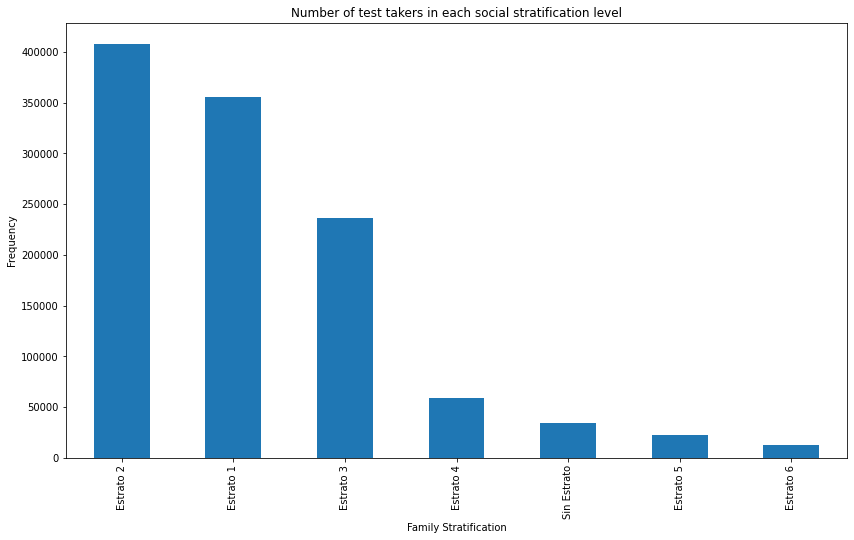

In [ ]:
ax = plt.figure(figsize=(10,6))
ax = df['fam_home_strat'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of test takers in each social stratification level")
ax.set_xlabel("Family Stratification")
ax.set_ylabel("Frequency")
plt.savefig("Family_stratification.png", dpi=500)
files.download("Family_stratification.png")

In [ ]:
sns.catplot(x='stu_wkly_wrk_hr', kind="count", palette="ch:.25", data=df)